# Visualização dos dados

## Tratamento dos Dados

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
vax_df = pd.read_csv("datasets/dados_vacinacao.csv")
casos_df = pd.read_csv('datasets/dados_casos.csv')

In [3]:
vax_df.head(2)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,Reforço,87,COVID-19 PFIZER - COMIRNATY,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...
1,5,2016-11-18,M,1,BRANCA,PARELHAS,None,CAMPINA GRANDE,207,Pessoas de 5 a 11 anos,0,NaN,2022-02-07,1ª Dose,99,COVID-19 PEDIÁTRICA - PFIZER COMIRNATY,52288faace8c986872faca7101868ae8a23fefd435cd51...


In [4]:
casos_df.head(2)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-08-22,PB,Água Branca,city,1128,14,True,10306,2500106,10945.08054,0.0124
1,2021-08-22,PB,Aguiar,city,528,5,True,5630,2500205,9378.33037,0.0095


Renomeando as categorias de vacina para facilitar a leitura e remoção da duplicação de códigos para o mesmo fabricante

In [5]:
vax_df.loc[(vax_df.vacina_nome == 'COVID-19 ASTRAZENECA - ChAdOx1-S') | (vax_df.vacina_nome == 'COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD'), 'vacina_nome'] = 'ASTRAZENECA'
vax_df.loc[(vax_df.vacina_nome == 'COVID-19 SINOVAC/BUTANTAN - CORONAVAC') | (vax_df.vacina_nome == 'COVID-19 SINOVAC - CORONAVAC'), 'vacina_nome'] = 'CORONAVAC'
vax_df.loc[vax_df.vacina_nome == 'COVID-19 JANSSEN - Ad26.COV2.S', 'vacina_nome'] = 'JANSEN'
vax_df.loc[vax_df.vacina_nome == 'COVID-19 PFIZER - COMIRNATY', 'vacina_nome'] = 'PFIZER'
vax_df.loc[vax_df.vacina_nome == 'COVID-19 PEDIÁTRICA - PFIZER COMIRNATY', 'vacina_nome'] = 'PFIZER PEDIÁTRICA'


vax_df.loc[vax_df.vacina_codigo == 89, 'vacina_codigo'] = 85
vax_df.loc[vax_df.vacina_codigo == 98, 'vacina_codigo'] = 86

In [6]:
vax_df.head(5)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,Reforço,87,PFIZER,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...
1,5,2016-11-18,M,1,BRANCA,PARELHAS,None,CAMPINA GRANDE,207,Pessoas de 5 a 11 anos,0,NaN,2022-02-07,1ª Dose,99,PFIZER PEDIÁTRICA,52288faace8c986872faca7101868ae8a23fefd435cd51...
2,39,1982-01-23,F,99,SEM INFORMACAO,CAMPINA GRANDE,58410,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-16,1ª Dose,85,ASTRAZENECA,0ffaed327aac7fe8abf0b35471b0b1fa60f9fc48ff7d9c...
3,33,1988-07-20,M,2,PRETA,BAYEUX,58110,BAYEUX,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-23,1ª Dose,85,ASTRAZENECA,fe78cee14dce3436024728b1d760439861021207a32712...
4,27,1994-03-22,M,3,PARDA,JOAO PESSOA,58058,JOAO PESSOA,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-12-07,2ª Dose,87,PFIZER,470944c18359d6a1fea2a53194d29bfdb7ce1d21b47979...


## Visualização dos dados:

### Vacinação por tipo de dose

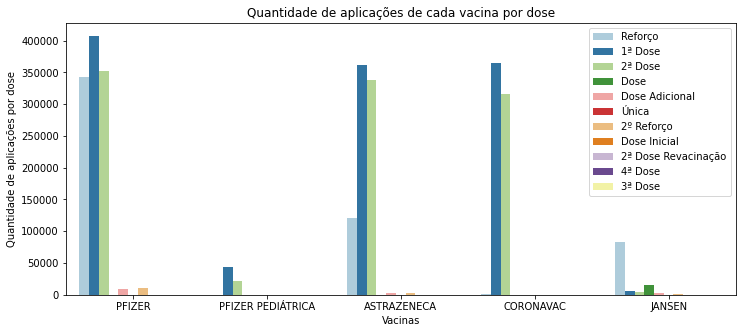

In [7]:
bar = sns.countplot(data=vax_df, x='vacina_nome', hue='vacina_descricao_dose', palette='Paired')
bar.set_xlabel('Vacinas')
bar.set_ylabel('Quantidade de aplicações por dose')
bar.set_title('Quantidade de aplicações de cada vacina por dose')
bar.figure.set_size_inches(12, 5)
plt.legend(loc = 'upper right')

Verificamos pelo gráfico que a vacina mais aplicada na Paraíba durante o período analisado foi a Pfizer, seguida pela Astrazeneca, CoronaVac e Jansen. Tal observação contrasta com o cenário nacional, tendo em vista que a vacina mais utilizada no país durante a campanha de COVID-19 foi a Astrazeneca, segundo dados do Ministério da Saúde (https://www.gov.br/saude/pt-br/assuntos/noticias/2022/janeiro/saiba-a-quantidade-de-doses-de-vacinas-covid-19-aplicadas-ate-o-momento-no-brasil-por-fabricante#:~:text=E%20tem%20mais%20not%C3%ADcia%20boa,milh%C3%B5es%20foram%20produzidas%20pela%20Janssen).

Também é possível perceber, a partir do gráfico, que a vacina da Pfizer foi a mais usada também nas doses de reforço, mais do que dobrando a quantidade de vacinas da Astrazeneca que foram usadas com o mesmo propósito, por exemplo.

### Vacinação por etnia

Text(0.5, 1.0, 'Vacinação por etnia')

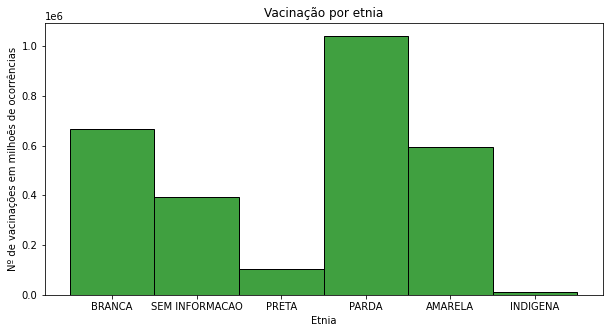

In [8]:
fig = sns.histplot(data=vax_df, x='paciente_racaCor_valor', color='g')
fig.set_xlabel('Etnia')
fig.set_ylabel('Nº de vacinações em milhoẽs de ocorrências')
fig.figure.set_size_inches(10, 5)
fig.set_title('Vacinação por etnia')

O Histograma acima lida com o número absoluto de vacinações. Isto é, cada dose, independente da classificação (1ª dose, dose de reforço, etc), contará na frequência de vacinação por etnia. Desse modo, percebemos que a maioria dos vacinados na Paraíba se autodeclaram pardos, seguidos dos autodeclarados brancos, e amarelos. 

### Mortalidade por Quantidade de Casos

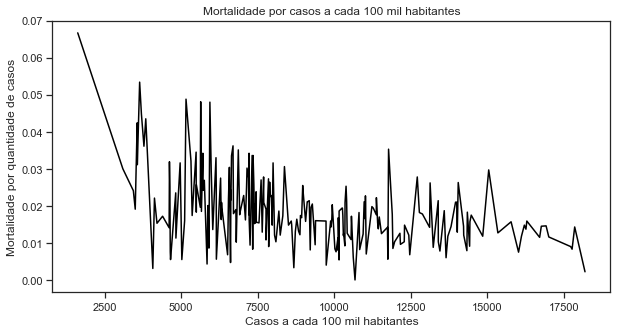

In [26]:
lin_drt = sns.lineplot(data=casos_df, x='confirmed_per_100k_inhabitants', y='death_rate', color='black')
lin_drt.set_xlabel('Casos a cada 100 mil habitantes')
lin_drt.set_ylabel('Mortalidade por quantidade de casos')
lin_drt.set_title('Mortalidade por casos a cada 100 mil habitantes')
lin_drt.figure.set_size_inches(10, 5)

A partir da leitura do gráfico, percebemos que os municípios com a menor quantidade de casos confirmados a cada 100 mil habitantes possuem a maior mortalidade. Tendo em mente que o cálculo da mortaliadade é feito dividindo o número de mortos pelo número de casos confirmados, uma explicação proposta para esse fenômeno é uma possível subnotificação de casos: municípios que testaram menos possuirão uma mortalidade inflada, caso a testagem seja feita mais frequentemente em casos graves da doença.

### SPLOM

Para criarmos o SPLOM do dataset de casos, primeiro vamos normalisar as variáveis que usaremos.

In [21]:
mean_confirmed = np.mean(casos_df['confirmed'])
std_confirmed = np.std(casos_df['confirmed'])

mean_deaths = np.mean(casos_df['deaths'])
std_deaths = np.std(casos_df['deaths'])

mean_pop = np.mean(casos_df['estimated_population'])
std_pop = np.std(casos_df['estimated_population'])

mean_100k = np.mean(casos_df['confirmed_per_100k_inhabitants'])
std_100k = np.std(casos_df['confirmed_per_100k_inhabitants'])

mean_dth_rt = np.mean(casos_df['death_rate'])
std_dth_rt = np.std(casos_df['death_rate'])

confirmed_norm = pd.Series(norm.cdf(casos_df['confirmed'], loc = mean_confirmed , scale = std_confirmed))
deaths_norm = pd.Series(norm.cdf(casos_df['deaths'], loc = mean_deaths, scale = std_deaths))
population_norm = pd.Series(norm.cdf(casos_df['estimated_population'], loc = mean_pop, scale = std_pop))
cp100k_norm = pd.Series(norm.cdf(casos_df['confirmed_per_100k_inhabitants'], loc = mean_100k, scale = std_100k))
dth_rt_norm = pd.Series(norm.cdf(casos_df['death_rate'],loc = mean_dth_rt , scale= std_dth_rt))

splom_columns = [confirmed_norm, deaths_norm, population_norm, cp100k_norm, dth_rt_norm]
splom_headers = ["confirmed", "deaths", "population", "confirmed per 100k inhabitants", "death rate"]
splom_df = pd.concat(splom_columns, axis=1, keys = splom_headers)

splom_df.head(3)

,confirmed,deaths,population,confirmed per 100k inhabitants,death rate
0,0.458052,0.448367,0.449973,0.685875,0.264779
1,0.426986,0.431288,0.420337,0.515425,0.178016
2,0.612858,0.559339,0.566033,0.931677,0.455742


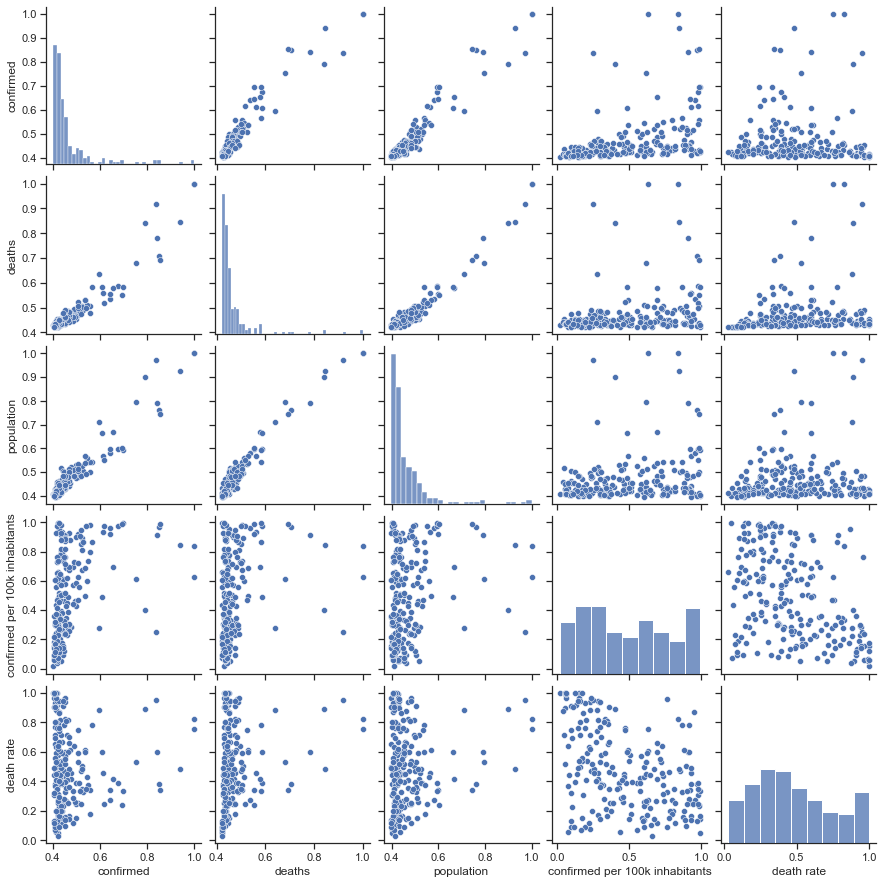

In [27]:
sns.set_theme(style="ticks")
sns.pairplot(splom_df)

histograma death rate: segue uma distribuição normal, exceto a última classe. muitos valores de mortalidade alta. histograma confirmed per 100k: valores bem lineares. demais histogramas: muitos valores baixos, poucos valores altos (patricamente distribuição populacional).

death rate e confirmed per 100k: dados MUITO espalhados concentrados nos valores baixos de população. Populações baixas tem dados muito dispersos.

deaths e confirmed crescem linearmente/quadraticamente com a população